Creating graphs for variables stock index, interest rate, oil/VC funding, government debt, consumer confidence index, trading volume

C:\Users\liyan\AppData\Local\Temp\ipykernel_28580\605518990.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarterly_avg_df = df[cols_to_process].resample('3M').mean()


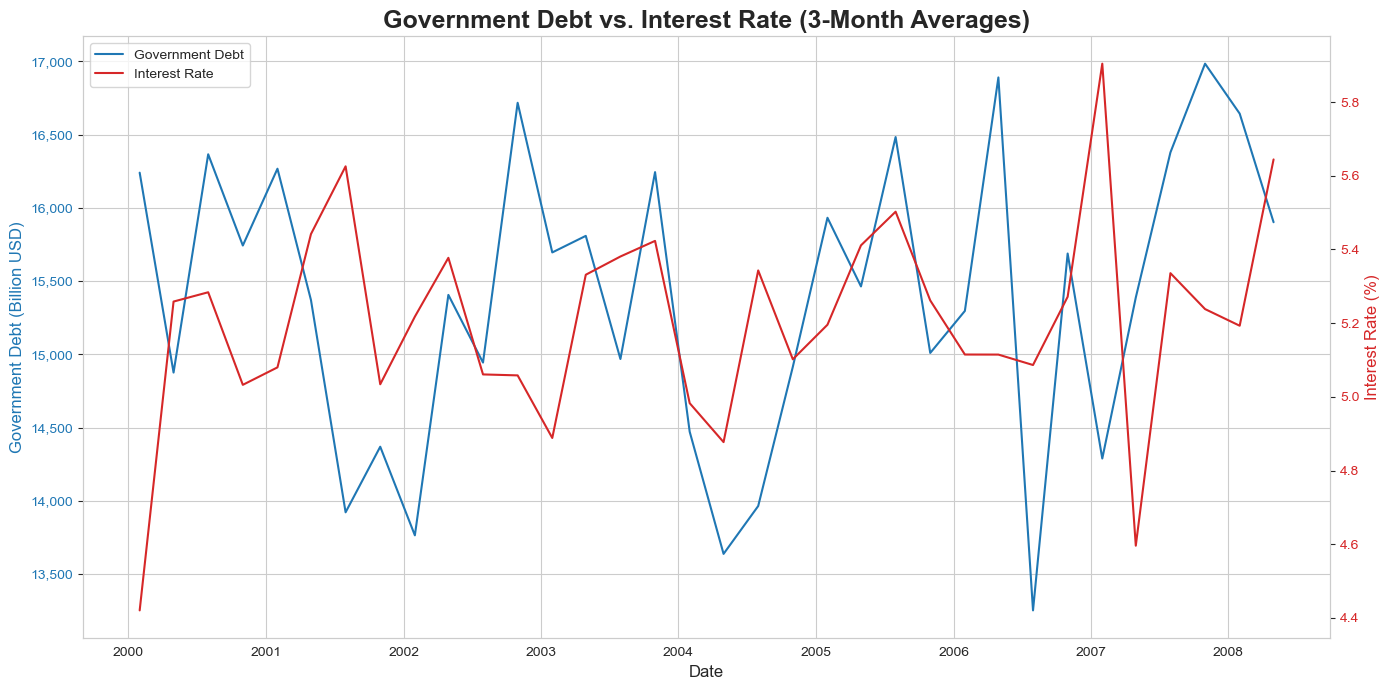

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# --- 1. Load and Clean the Data ---

try:
    df = pd.read_csv('finance_economics_dataset.csv')
except FileNotFoundError:
    print("Error: 'finance_economics_dataset.csv' not found.")
    print("Please download the dataset and place it in the same folder as this script.")
    exit()

# Clean column names for consistency
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\ufeff', '')
df.columns = df.columns.str.title()

# --- 2. Prepare and Resample Data ---

# Identify the columns to work with
debt_col = 'Government Debt (Billion Usd)'
rate_col = 'Interest Rate (%)'
cols_to_process = [debt_col, rate_col]

# Convert all relevant columns to numeric, coercing errors
for col in cols_to_process:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Drop rows with any missing values in the processed columns
df.dropna(subset=cols_to_process, inplace=True)

# Resample data into 3-month bins and calculate the mean for each bin
quarterly_avg_df = df[cols_to_process].resample('3M').mean()
quarterly_avg_df.dropna(inplace=True) # Remove any bins that might be empty

# --- 3. Create a Dual-Axis Line Plot ---

# Set up the plot style and figure
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(14, 7))

# Define colors for clarity
color1 = 'tab:blue'
color2 = 'tab:red'

# Plot Government Debt on the primary y-axis (ax1)
sns.lineplot(data=quarterly_avg_df, x=quarterly_avg_df.index, y=debt_col, ax=ax1, color=color1, label='Government Debt')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Government Debt (Billion USD)', color=color1, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color1)
# Formatter to make y-axis more readable (e.g., 10,000 instead of 10000)
ax1.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))


# Create a secondary y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot Interest Rate on the secondary y-axis (ax2)
sns.lineplot(data=quarterly_avg_df, x=quarterly_avg_df.index, y=rate_col, ax=ax2, color=color2, label='Interest Rate')
ax2.set_ylabel('Interest Rate (%)', color=color2, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(False) # Turn off the grid for the second axis to avoid clutter

# --- 4. Finalize and Show the Plot ---

# Add a title
plt.title('Government Debt vs. Interest Rate (3-Month Averages)', fontsize=18, weight='bold')

# Create a unified legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
ax2.get_legend().remove() # Remove the automatic legend from the second axis

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\liyan\AppData\Local\Temp\ipykernel_28580\1361172931.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarterly_avg_df = plot_df.resample('3M').mean().dropna()


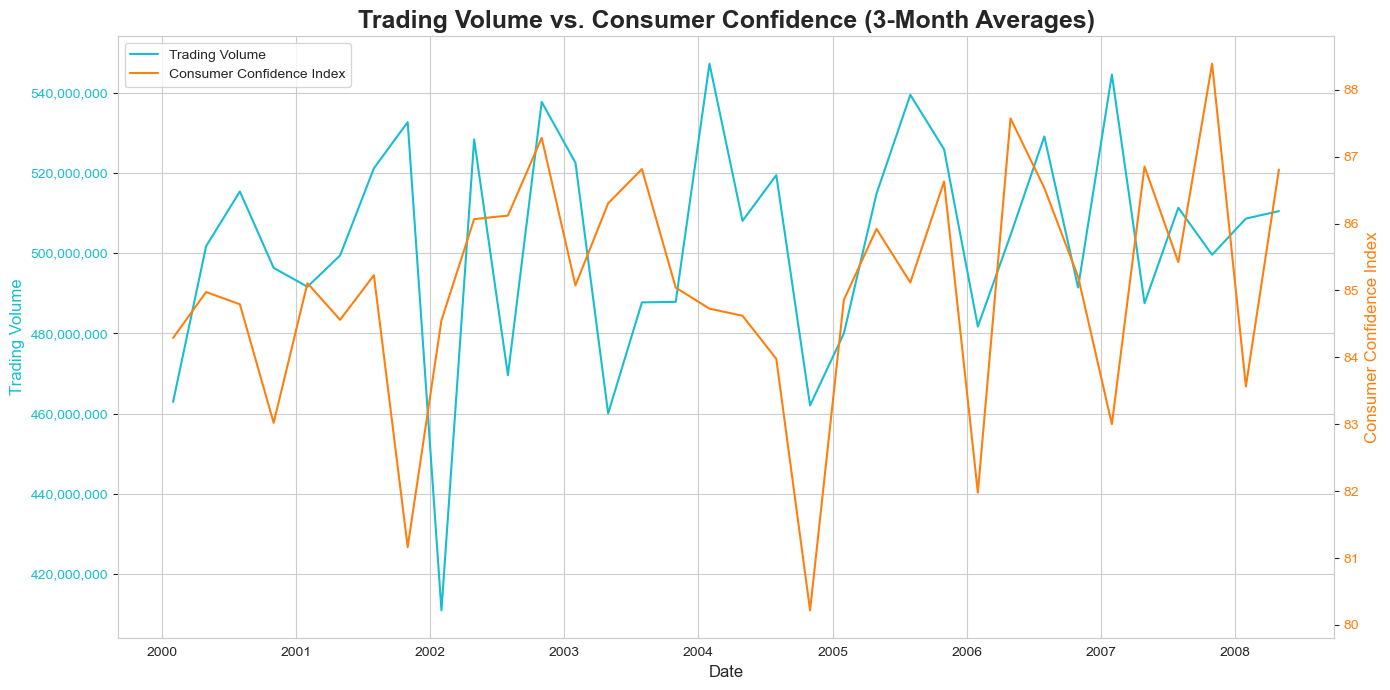

C:\Users\liyan\AppData\Local\Temp\ipykernel_28580\1361172931.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarterly_avg_df = plot_df.resample('3M').mean().dropna()


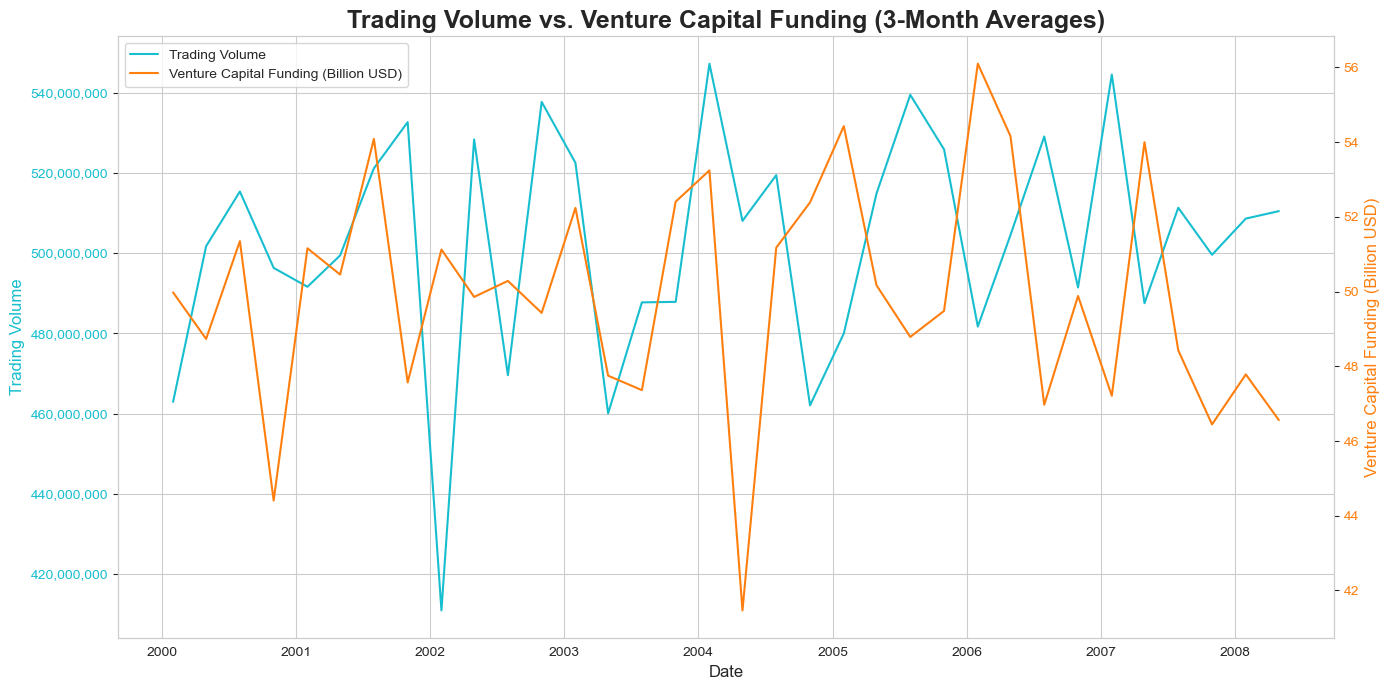

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# --- 1. Load and Clean the Data ---

df = pd.read_csv('finance_economics_dataset.csv')

# Clean column names for consistency
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\ufeff', '')
df.columns = df.columns.str.title()

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


# --- Function to Create a Dual-Axis Plot ---

def create_dual_axis_plot(data, col1, col1_label, col2, col2_label, title):
    """
    Generates and displays a dual-axis time series plot for two variables.
    """
    # Prepare data for the specific columns
    cols_to_process = [col1, col2]
    for col in cols_to_process:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')

    plot_df = data[cols_to_process].dropna()

    # Resample data into 3-month bins and calculate the mean
    quarterly_avg_df = plot_df.resample('3M').mean().dropna()

    # --- Plotting ---
    sns.set_style("whitegrid")
    fig, ax1 = plt.subplots(figsize=(14, 7))

    color1 = 'tab:cyan'
    color2 = 'tab:orange'

    # Plot Col 1 on the primary y-axis
    sns.lineplot(data=quarterly_avg_df, x=quarterly_avg_df.index, y=col1, ax=ax1, color=color1, label=col1_label)
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel(col1_label, color=color1, fontsize=12)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

    # Create a secondary y-axis
    ax2 = ax1.twinx()

    # Plot Col 2 on the secondary y-axis
    sns.lineplot(data=quarterly_avg_df, x=quarterly_avg_df.index, y=col2, ax=ax2, color=color2, label=col2_label)
    ax2.set_ylabel(col2_label, color=color2, fontsize=12)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.grid(False)

    # Finalize and show the plot
    plt.title(title, fontsize=18, weight='bold')
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    ax2.get_legend().remove()
    plt.tight_layout()
    plt.show()


# Plot 1: Trading Volume vs. Consumer Confidence
create_dual_axis_plot(
    data=df.copy(),
    col1='Trading Volume',
    col1_label='Trading Volume',
    col2='Consumer Confidence Index',
    col2_label='Consumer Confidence Index',
    title='Trading Volume vs. Consumer Confidence (3-Month Averages)'
)

# Plot 2: Trading Volume vs. Venture Capital Funding
create_dual_axis_plot(
    data=df.copy(),
    col1='Trading Volume',
    col1_label='Trading Volume',
    col2='Venture Capital Funding (Billion Usd)',
    col2_label='Venture Capital Funding (Billion USD)',
    title='Trading Volume vs. Venture Capital Funding (3-Month Averages)'
)


Pairplot of Daily High, Interest Rate, Corporate Profits, Daily Low, Venture Capital Funding
I could not find any obvious relationships besides the proportional linear relationship between daily high and daily low

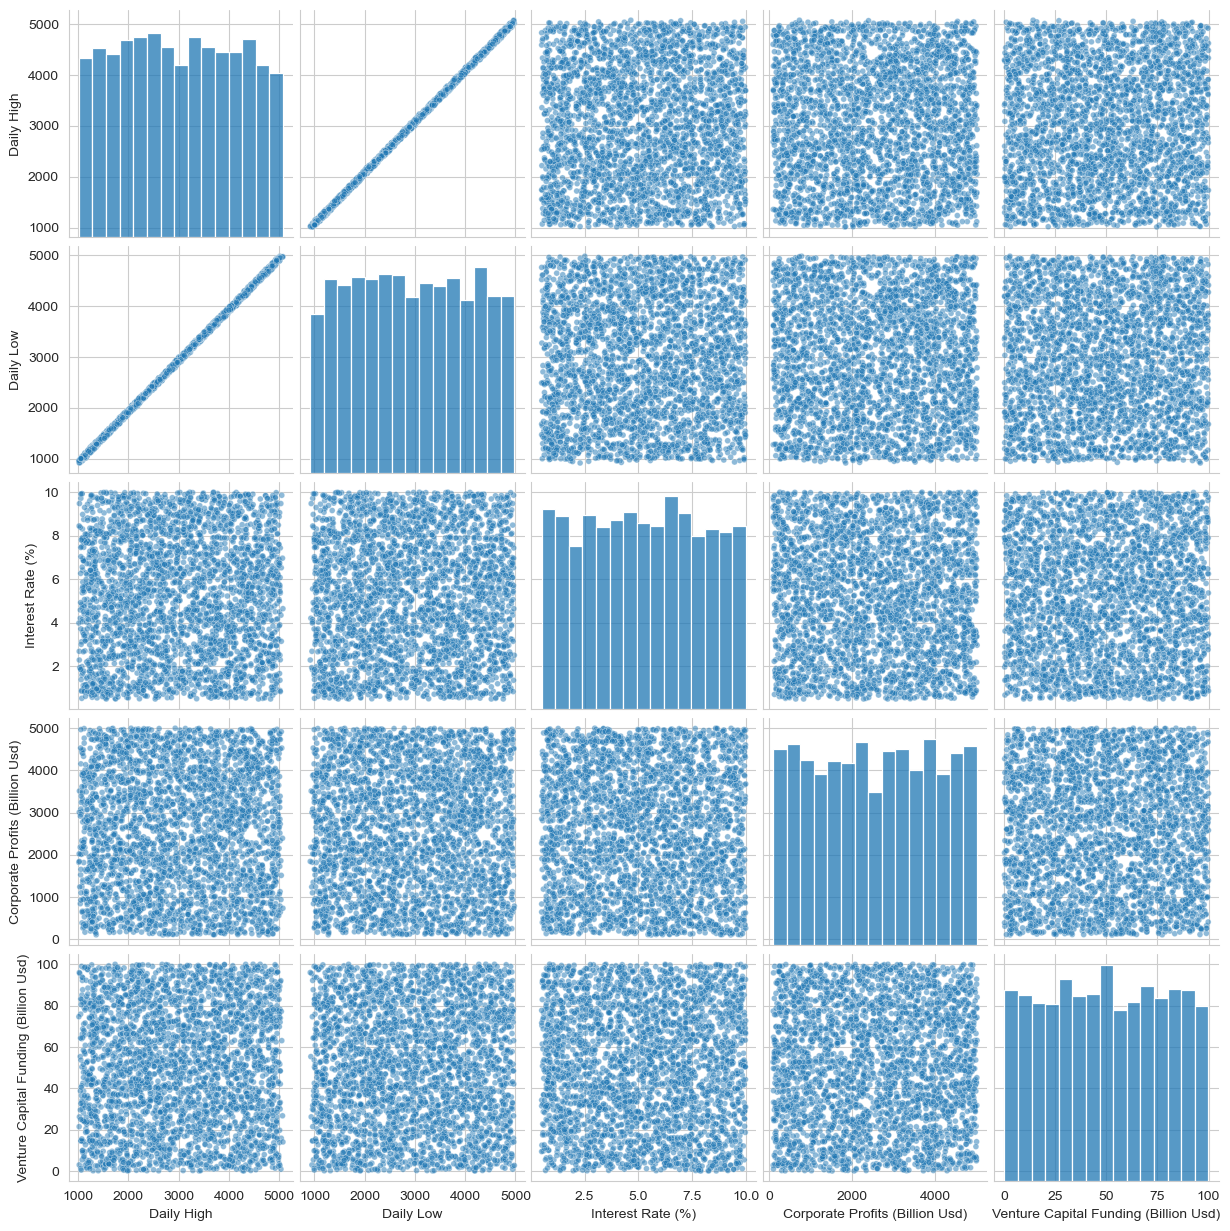

In [13]:
sns.pairplot(df,
             vars=['Daily High', 'Daily Low', 'Interest Rate (%)', 'Corporate Profits (Billion Usd)', 'Venture Capital Funding (Billion Usd)'],
             plot_kws={'alpha':0.5, 'size': 0.1})

Plot with the three indexes (Nasdaq, Dow Jones, and S&P 500)'s opening and closing price
Pairplot with those series (apply mask to get those specific indexes) 
* Gold Price, Real Estate Index, Crude Oil Price

Plots of the different stock indexes compared with open price, closing price, GDP growth, venture capital spending, trading volume, and consumer confidece index


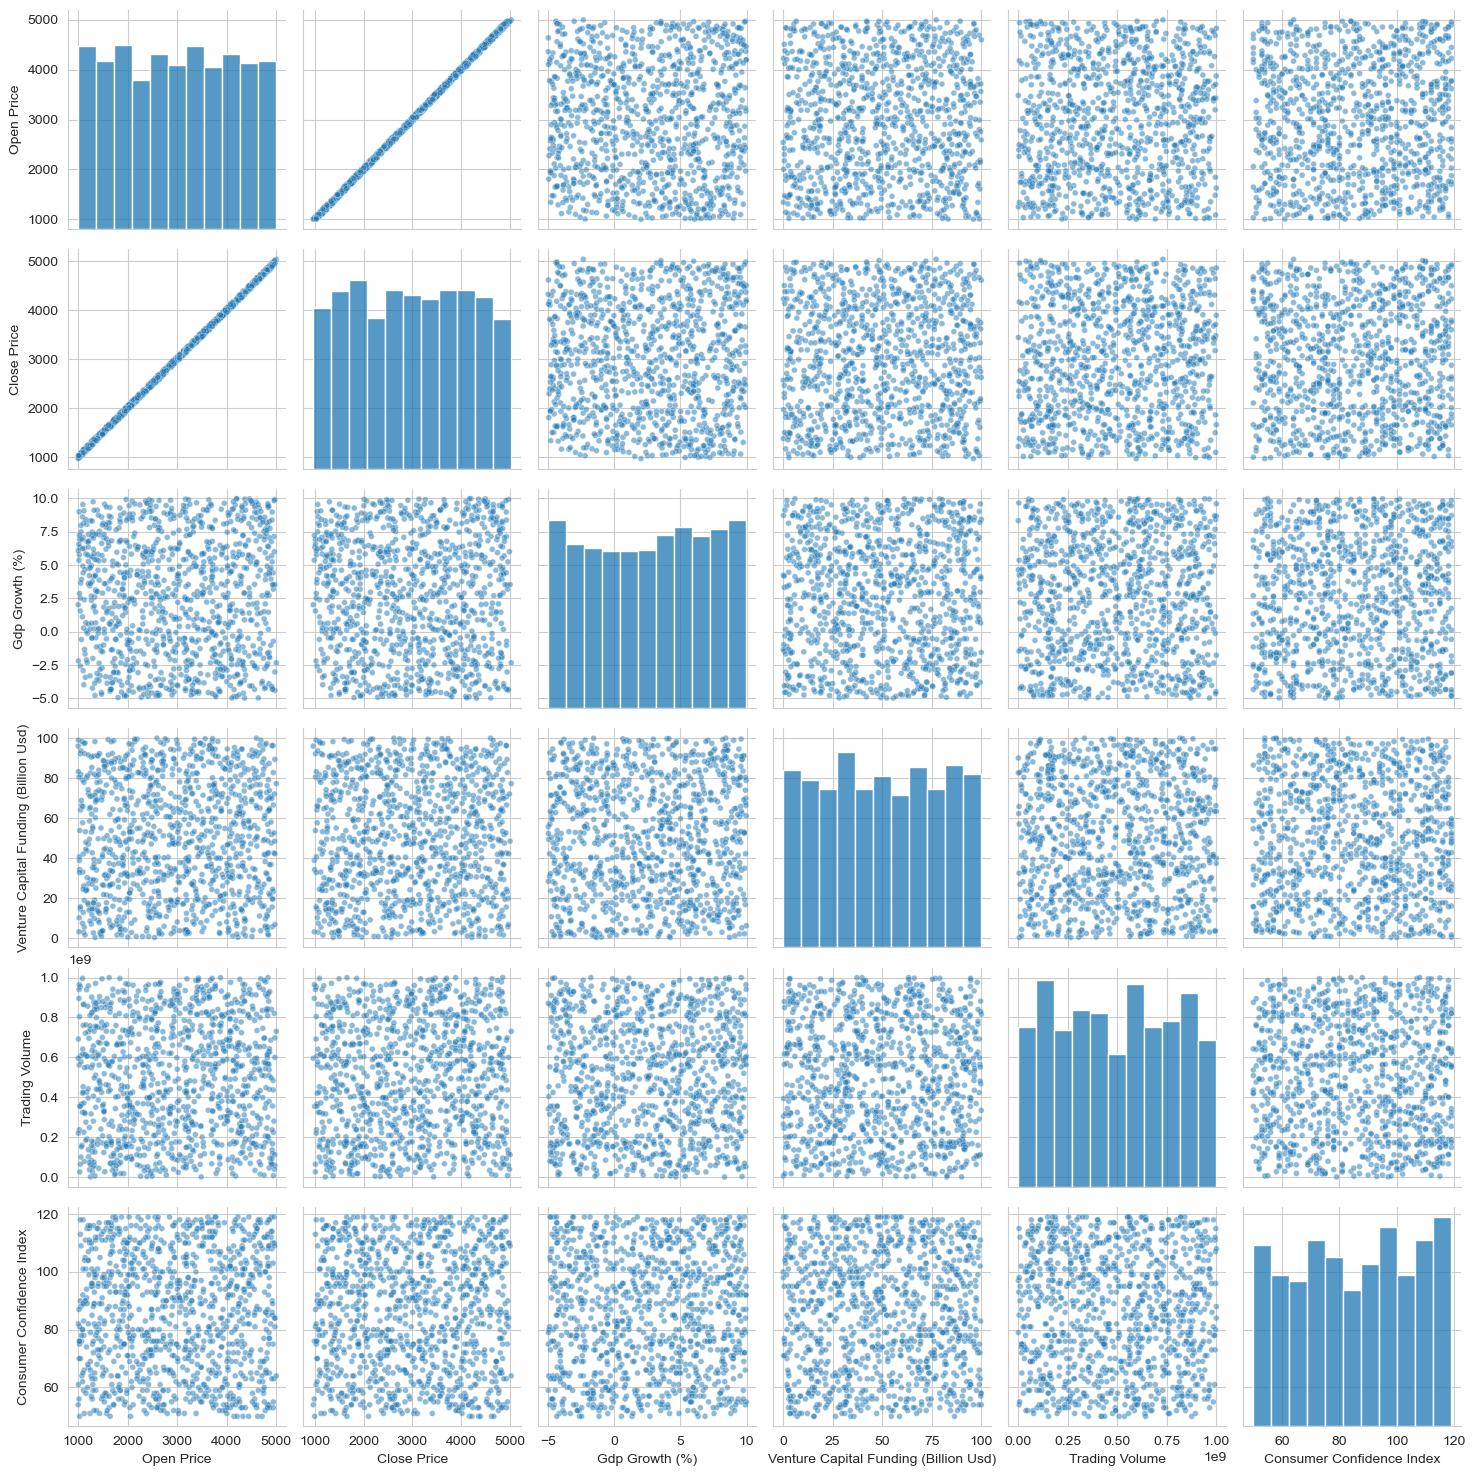

In [ ]:
import pandas as pd

# --- 1. Load and Clean the Main DataFrame ---

df = pd.read_csv('finance_economics_dataset.csv')

# Clean all column names for consistency
df.columns = df.columns.str.strip().str.replace('\ufeff', '').str.title()

# --- 2. IMPORTANT: Verify Column Names ---
# This will print the first 5 rows and a list of your exact column names.
# Use this output to verify the names used in the variables below.
# print("--- First 5 Rows of Your DataFrame ---")
# print(df.head())
# print("\n--- Your Actual Column Names ---")
# print(df.columns.tolist())
# print("\n" + "="*50 + "\n")


# --- 3. Define Column and Index Names ---
# VERIFY THESE NAMES against the output from the print statements above.
# You may need to change 'Stock Index' or 'Close' to match your file exactly.
date_col = 'Date'
index_name_col = 'Stock Index'  # The column identifying which index it is
value_col = 'Close'             # The column with the actual stock price


# --- 4. Filter to Create a New DataFrame for Each Stock Index ---

# Ensure the Date column is in datetime format
df[date_col] = pd.to_datetime(df[date_col])

# Create the NASDAQ DataFrame by filtering rows
nasdaq_df = df[df[index_name_col] == 'NASDAQ'].copy()
nasdaq_df.dropna(inplace=True)

# Create the S&P 500 DataFrame by filtering rows
sp500_df = df[df[index_name_col] == 'S&P 500'].copy()
sp500_df.dropna(inplace=True)

# Create the Dow Jones DataFrame by filtering rows
dowjones_df = df[df[index_name_col] == 'Dow Jones'].copy()
dowjones_df.dropna(inplace=True)


# --- 5. Verify the New DataFrames ---

# print("--- NASDAQ Composite DataFrame (Created) ---")
# print(nasdaq_df.head())
# print("\n" + "="*40 + "\n")

# print("--- S&P 500 DataFrame (Created) ---")
# print(sp500_df.head())
# print("\n" + "="*40 + "\n")

# print("--- Dow Jones Industrial Average DataFrame (Created) ---")
# print(dowjones_df.head())

print("Plots of the different stock indexes comparing daily high, daily low, interest rate," 
      " real estate index, gold price, and crude oil price")
print("Nasdaq") 
sns.pairplot(nasdaq_df,
             vars=['Daily High', 'Daily Low', 'Interest Rate (%)', 'Real Estate Index', 'Gold Price (Usd Per Ounce)', 'Crude Oil Price (Usd Per Barrel)'],
             plot_kws={'alpha':0.5, 'size': 0.1})
print("S&P 500")
sns.pairplot(sp500_df,
             vars=['Daily High', 'Daily Low', 'Interest Rate (%)', 'Real Estate Index', 'Gold Price (Usd Per Ounce)', 'Crude Oil Price (Usd Per Barrel)'],
             plot_kws={'alpha':0.5, 'size': 0.1})
print("Dow Jones")
sns.pairplot(dowjones_df,
             vars=['Daily High', 'Daily Low', 'Interest Rate (%)', 'Real Estate Index', 'Gold Price (Usd Per Ounce)', 'Crude Oil Price (Usd Per Barrel)'],
             plot_kws={'alpha':0.5, 'size': 0.1})

print("Plots of the different stock indexes compared with open price, closing price, GDP growth, venture capital spending,"
      " trading volume, and consumer confidece index")

sns.pairplot(nasdaq_df,
             vars=['Open Price', 'Close Price', 'Gdp Growth (%)', 'Venture Capital Funding (Billion Usd)', 'Trading Volume', 'Consumer Confidence Index'],
             plot_kws={'alpha':0.5, 'size': 0.1})

sns.pairplot(sp500_df,
             vars=['Open Price', 'Close Price', 'Gdp Growth (%)', 'Venture Capital Funding (Billion Usd)', 'Trading Volume', 'Consumer Confidence Index'],
             plot_kws={'alpha':0.5, 'size': 0.1})

sns.pairplot(dowjones_df,
             vars=['Open Price', 'Close Price', 'Gdp Growth (%)', 'Venture Capital Funding (Billion Usd)', 'Trading Volume', 'Consumer Confidence Index'],
             plot_kws={'alpha':0.5, 'size': 0.1})
